In [3]:
import numpy as np
import pandas as pd

In [11]:
user_details = pd.read_excel('Data Analyst Intern Assignment - Excel.xlsx', sheet_name='UserDetails.csv')

In [13]:
print(user_details.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64


In [45]:
user_details.duplicated().sum()

0

In [15]:
cooking_sessions = pd.read_excel('Data Analyst Intern Assignment - Excel.xlsx', sheet_name='CookingSessions.csv')

In [17]:
print(cooking_sessions.isnull().sum())

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64


In [49]:
order_details = pd.read_excel('Data Analyst Intern Assignment - Excel.xlsx', sheet_name='OrderDetails.csv')

In [51]:
print(order_details.isnull().sum())

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [53]:
order_details = order_details.dropna(subset=['Order ID', 'User ID', 'Dish Name'])

In [55]:
order_details['Rating'] = order_details['Rating'].fillna(order_details['Rating'].mean())

In [59]:
order_details = order_details.drop_duplicates()

In [61]:
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])
order_details['Amount (USD)'] = pd.to_numeric(order_details['Amount (USD)'], errors='coerce')
order_details['Rating'] = pd.to_numeric(order_details['Rating'], errors='coerce')

In [63]:
order_details.to_csv('Cleaned_OrderDetails.csv', index=False)

In [65]:
print(order_details.isnull().sum())

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64


In [67]:
user_sessions = pd.merge(cooking_sessions, user_details, on='User ID', how='inner')

In [105]:
merged_data = pd.merge(user_sessions, order_details, on='Session ID', how='inner')
print(merged_data.head())

  Session ID User ID_x      Dish Name_x Meal Type_x       Session Start  \
0       S001      U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S002      U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
2       S003      U003  Grilled Chicken      Dinner 2024-12-02 19:30:00   
3       S004      U001         Pancakes   Breakfast 2024-12-02 07:30:00   
4       S005      U004     Caesar Salad       Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  Calculated Duration  \
0 2024-12-01 19:30:00               30             4.5                 30.0   
1 2024-12-01 12:20:00               20             4.0                 20.0   
2 2024-12-02 20:10:00               40             4.8                 40.0   
3 2024-12-02 08:00:00               30             4.2                 30.0   
4 2024-12-03 13:15:00               15             4.7                 15.0   

       User Name  ...  Total Orders Order ID User ID_y Order Date Meal Typ

In [109]:
print(merged_data.columns)

Index(['Session ID', 'User ID_x', 'Dish Name_x', 'Meal Type_x',
       'Session Start', 'Session End', 'Duration (mins)', 'Session Rating',
       'Calculated Duration', 'User Name', 'Age', 'Location',
       'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders',
       'Order ID', 'User ID_y', 'Order Date', 'Meal Type_y', 'Dish Name_y',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating'],
      dtype='object')


### (a) Relationship Between Cooking Sessions and Orders

In [112]:
correlation = merged_data[['Session Rating', 'Rating']].corr()
print("Correlation between session and order ratings:")
print(correlation)

Correlation between session and order ratings:
                Session Rating   Rating
Session Rating         1.00000  0.61151
Rating                 0.61151  1.00000


### (b) Identify Popular Dishes

In [115]:
popular_dishes = merged_data.groupby('Dish Name_x').agg(
    total_orders=('Order ID', 'count'),
    avg_rating=('Session Rating', 'mean')).sort_values(by='total_orders', ascending=False)

print("Most popular dishes:")
print(popular_dishes.head())


Most popular dishes:
                 total_orders  avg_rating
Dish Name_x                              
Grilled Chicken             4    4.775000
Spaghetti                   4    4.625000
Caesar Salad                3    4.366667
Pancakes                    2    4.400000
Veggie Burger               2    4.350000


### (c) Demographic Insights

In [121]:
orders_by_location = merged_data.groupby('Location')['Order ID'].count()
print("Orders by location:")
print(orders_by_location)


Orders by location:
Location
Austin           1
Boston           1
Chicago          3
Los Angeles      3
Miami            1
New York         3
San Francisco    2
Seattle          2
Name: Order ID, dtype: int64


## Visualizations

 Popular Dishes

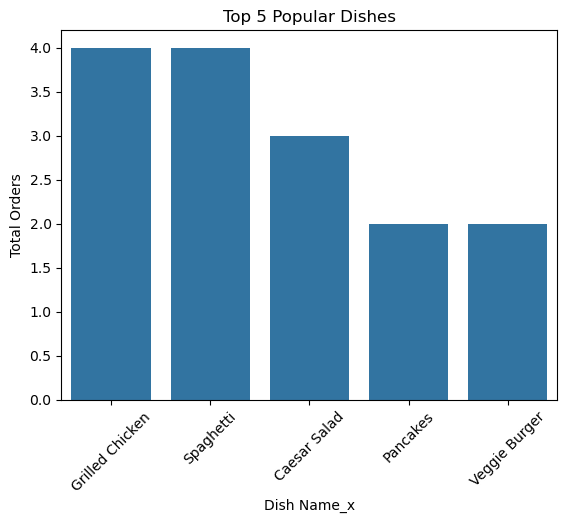

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=popular_dishes.index[:5], y=popular_dishes['total_orders'][:5])
plt.title('Top 5 Popular Dishes')
plt.xlabel('Dish Name_x')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


Demographic Analysis

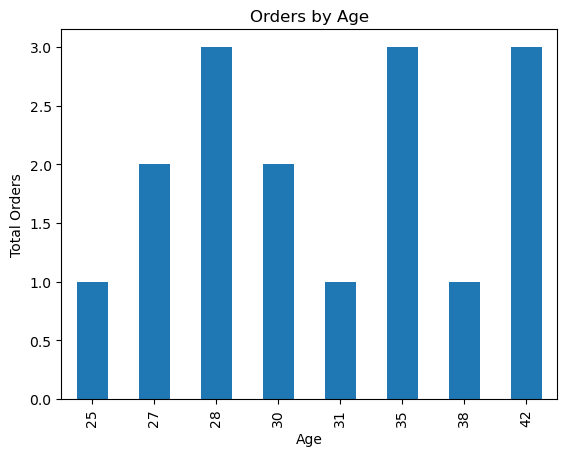

In [126]:
merged_data.groupby('Age')['Order ID'].count().plot(kind='bar')
plt.title('Orders by Age')
plt.xlabel('Age')
plt.ylabel('Total Orders')
plt.show()


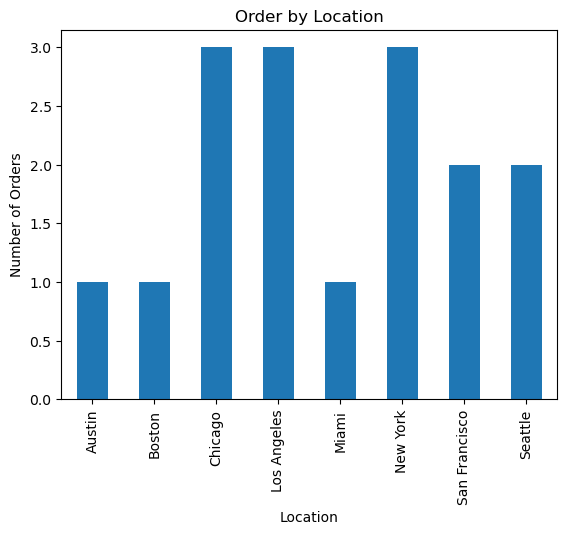

In [132]:
merged_data.groupby('Location')['Order ID'].count().plot(kind='bar')
plt.title('Order by Location')
plt.xlabel('Location')
plt.ylabel('Number of Orders')
plt.show()